In [2]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
pd.set_option('display.max_columns', None)

In [6]:
data = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
data.columns = [col.lower().replace(' ', '_')  for col in data.columns]

In [7]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


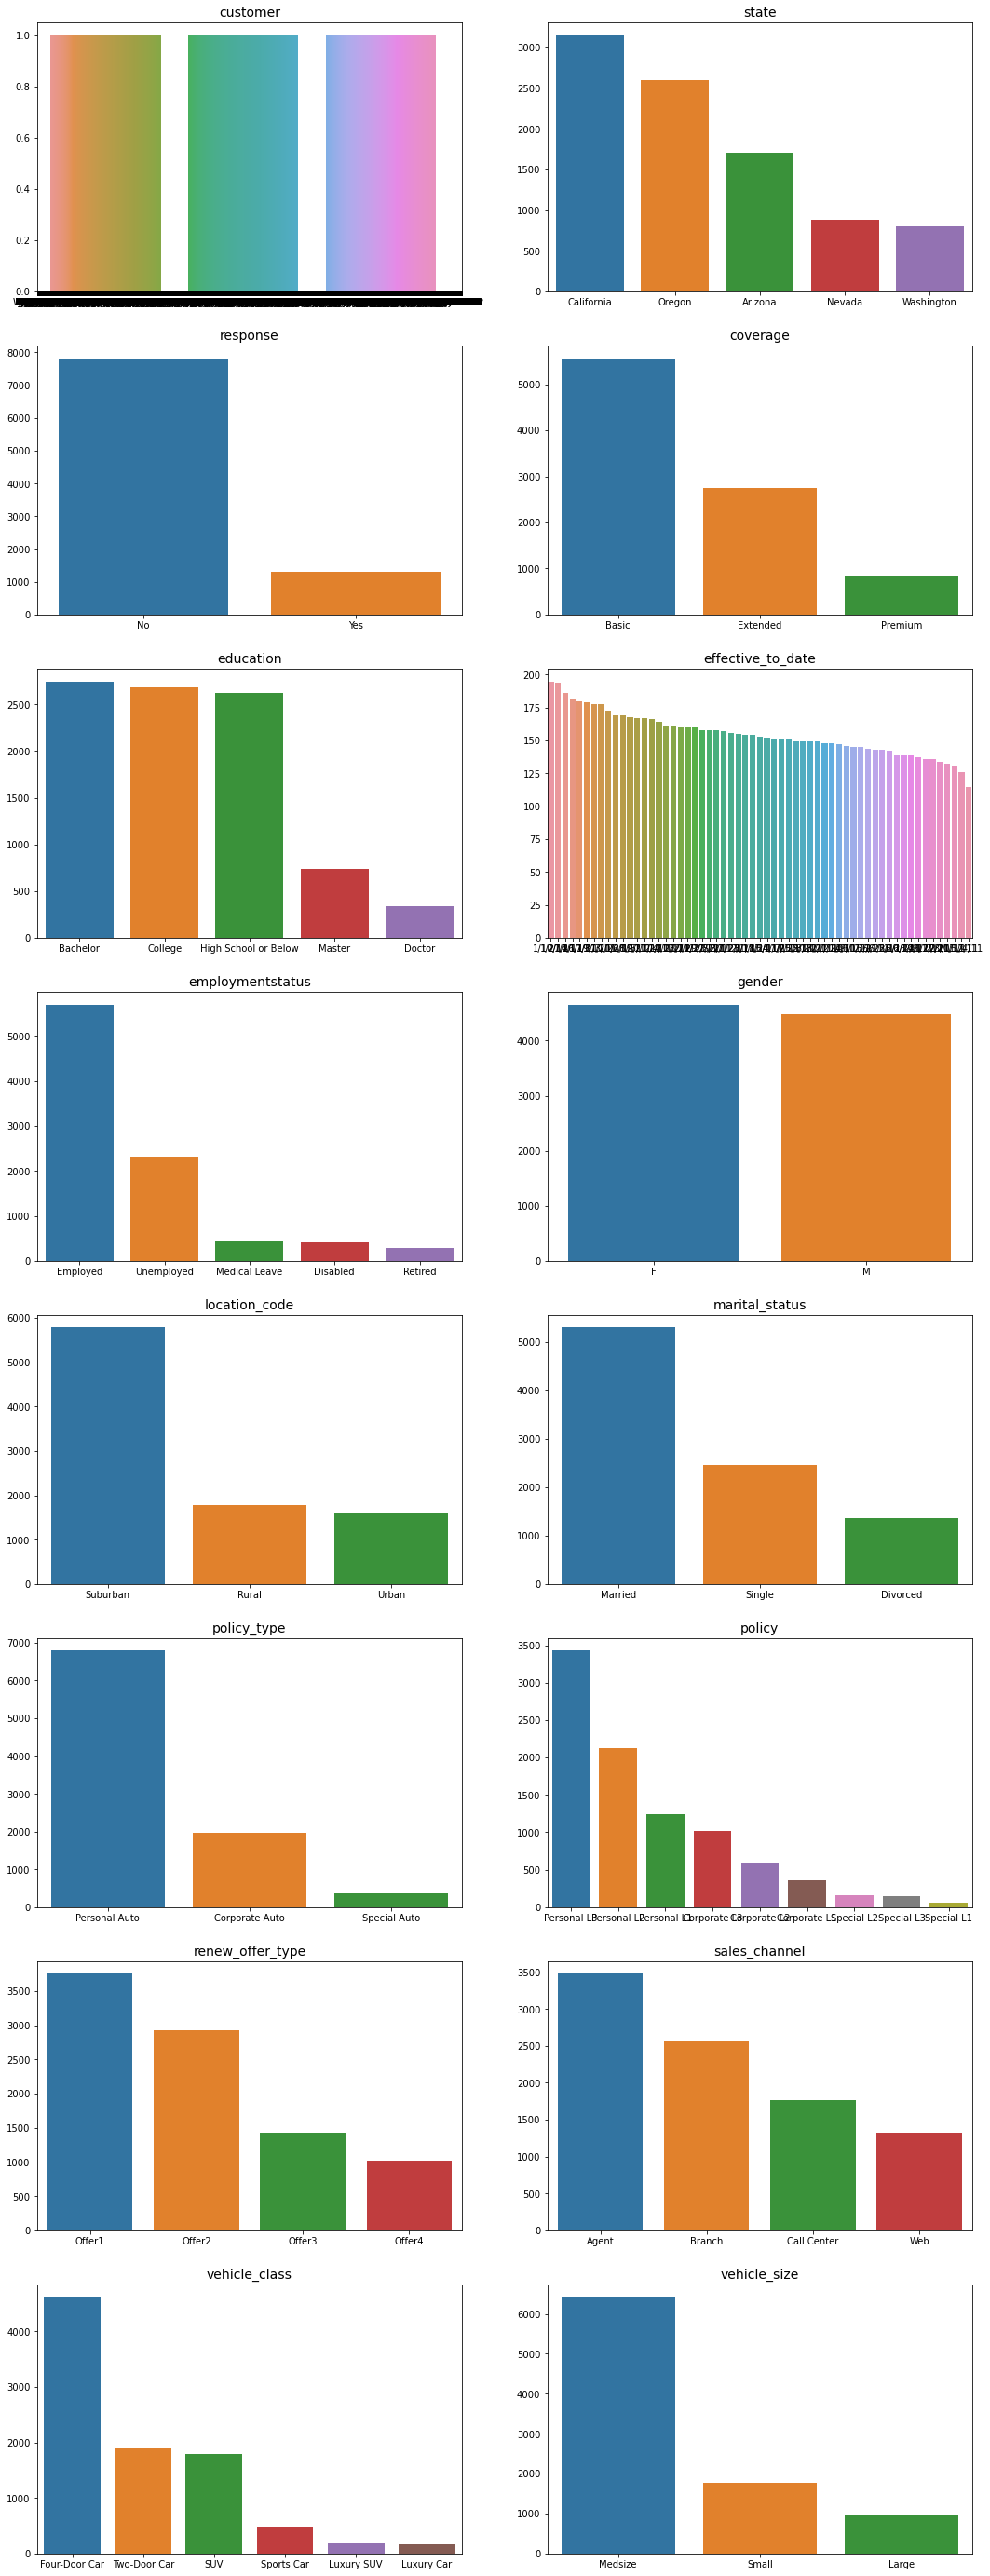

In [8]:
f, axes = plt.subplots(int(categoricals.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categoricals):

    sns.barplot(x = categoricals[col].value_counts().index,
                y = categoricals[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

<AxesSubplot:ylabel='policy'>

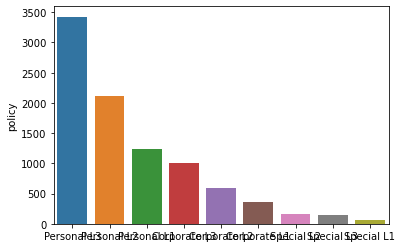

In [9]:
sns.barplot(x = categoricals["policy"].value_counts().index, y = categoricals["policy"].value_counts())

In [10]:
categoricals["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [11]:
L = categoricals["policy"].apply(lambda x: x[-2:])
policy = categoricals["policy"].apply(lambda x: x[:-2])

In [12]:
L.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [13]:
categoricals["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [14]:
categoricals["marital_status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [15]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

In [16]:
categoricals["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [17]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

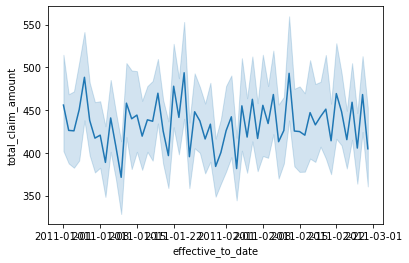

In [18]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = data)

In [19]:
time_df = pd.DataFrame()
time_df["day"] = data["effective_to_date"].dt.day
time_df["week"] = data["effective_to_date"].dt.week
time_df["month"] = data["effective_to_date"].dt.month
time_df["target"] = data["total_claim_amount"]

In [20]:
time_df['month'].unique()

array([2, 1], dtype=int64)

<AxesSubplot:xlabel='month', ylabel='target'>

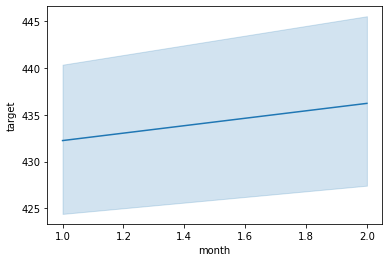

In [21]:
sns.lineplot(x="month", y="target", data = time_df)